<a href="https://colab.research.google.com/github/marinalgarcia/Grupo_2_DatosVivos_TP5/blob/primer_cambio/TP_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 📍 Objetivo
Resolver la prueba técnica para el puesto de Data Analyst de la startup [ifood](https://www.ifood.com.br/) de Brasil.
<br>Esta startup se dedica al servicio de delivery de comida similar a Pedidos Ya, Rappi y Uber Eats.

## 📍 Contexto

La empresa
Considere una empresa bien establecida que opera en el sector minorista de alimentos. Actualmente tienen alrededor varios cientos de miles de clientes registrados y sirven a casi un millón de consumidores al año. Venden productos de 5 categorías principales: vinos, productos cárnicos raros, frutas exóticas, especialmente Pescados preparados y productos dulces. Estos se pueden dividir en productos premium y productos regulares.

Los clientes pueden ordenar y adquirir productos a través de 3 canales de venta: tiendas físicas, catálogos y el sitio web de la empresa. A nivel mundial, la compañía tuvo ingresos sólidos y un resultado final saludable en el últimos 3 años, pero las perspectivas de crecimiento de ganancias para los próximos 3 años no son prometedoras ...

Por esta razón, se están considerando varias iniciativas estratégicas para revertir esta situación. Una es mejorar la realización de actividades de marketing, con un enfoque especial en las campañas de marketing.

### El Departamento de Marketing

El departamento de marketing fue presionado para gastar su presupuesto anual de manera más inteligente. La CMO
percibe la importancia de tener un enfoque más cuantitativo a la hora de tomar decisiones, por lo que **se contrató a un pequeño equipo de científicos de datos con un objetivo claro en mente: construir una solución que apoye las iniciativas de marketing directo.**
<br>Deseablemente, el éxito de estas actividades demostrará el área de oportunidad y también deberan convencer a los más escépticos dentro de la empresa.

### El objetivo del equipo

Es construir un análisis para abordar el mayor beneficio para la próxima campaña de marketing, programada para el próximo mes. La nueva campaña, la sexta, tiene como objetivo vender a una NUEVA base de datos de clientes.

**Para construir el análisis, se desarrolló una campaña piloto que involucró 2.240 clientes. Los clientes fueron seleccionados al azar y contactados por teléfono con respecto a la adquisición del gadget. Durante los meses siguientes, los clientes que compraron la oferta fueron debidamente etiquetados.**

El coste total de la campaña de muestra fue de 6.720MU y los ingresos generado por los clientes que aceptaron la oferta fue de 3.674MU. A nivel mundial, la campaña tuvo un beneficio de -3.046MU. La tasa de éxito de la campaña fue del 15%.


## 📍 Consideraciones

- Creen un modelo de clasificación utilizando Random Forest para la columna `Response`.
- Guarden el modelo de clasificación Random forest como `rfc.pkl`.
- Creen un modelo con regresión lineal y con Random Forest + GridsearchCV para predecir la columna `Income`.
- Guardar ambos modelos de regresion en pkl `lr.pkl` y `rfr.pkl`
- Cargar proyecto en Github / Gitlab, usen git y git-lfs para los `.csv` y `.pkl`.

## 1) Cargamos los datos!

In [1]:
#HABILITO IMPORTACION DESDE DRIVE
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
#!pip install funpymodeling
from funpymodeling.exploratory import status, freq_tbl

In [3]:
df = pd.read_csv('/content/drive/MyDrive/BOOTCAMP - GERIES 4/TP5/jueves_tarea__dataset/marketing_campaign.csv', sep = ';')
df.head(4)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0


## 2) Preparación de la data

In [4]:
status(df)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,ID,0,0.000000,1,0.000446,2240,int64
1,Year_Birth,0,0.000000,0,0.000000,59,int64
2,Education,0,0.000000,0,0.000000,5,object
3,Marital_Status,0,0.000000,0,0.000000,8,object
4,Income,24,0.010714,0,0.000000,1974,float64
5,Kidhome,0,0.000000,1293,0.577232,3,int64
6,Teenhome,0,0.000000,1158,0.516964,3,int64
7,Dt_Customer,0,0.000000,0,0.000000,663,object
8,Recency,0,0.000000,28,0.012500,100,int64
9,MntWines,0,0.000000,13,0.005804,776,int64


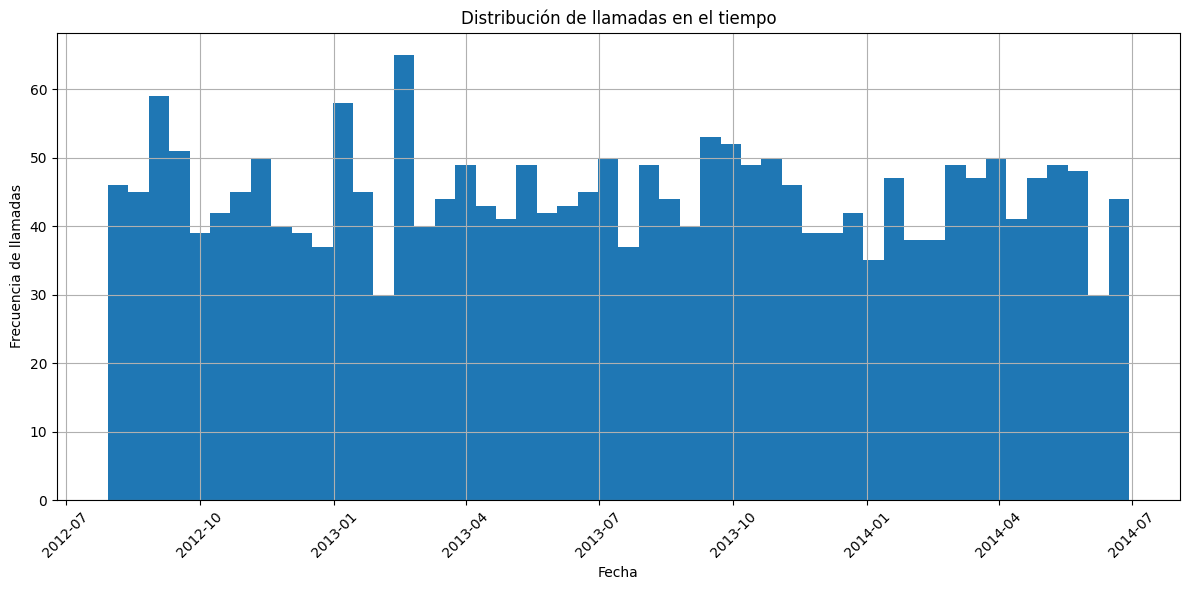

In [5]:
#Esta columna la discretizamos o la eliminamos?
#df['Dt_Customer'].unique()
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convertir a datetime si no lo está
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

# Gráfico de distribución temporal
plt.figure(figsize=(12, 6))
df['Dt_Customer'].hist(bins=50)
plt.title('Distribución de llamadas en el tiempo')
plt.xlabel('Fecha')
plt.ylabel('Frecuencia de llamadas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

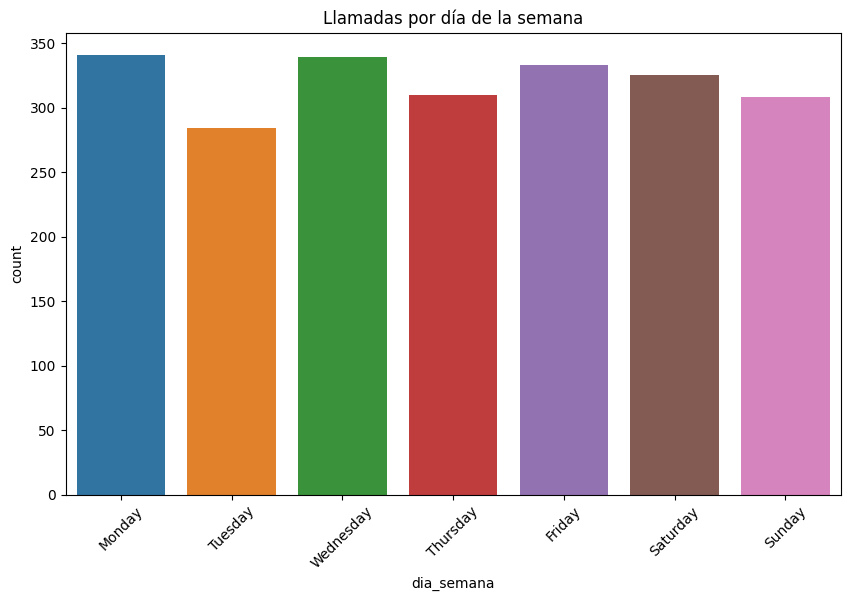

In [6]:
# Extraer día de la semana
df['dia_semana'] = df['Dt_Customer'].dt.day_name()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='dia_semana',
              order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Llamadas por día de la semana')
plt.xticks(rotation=45)
plt.show()

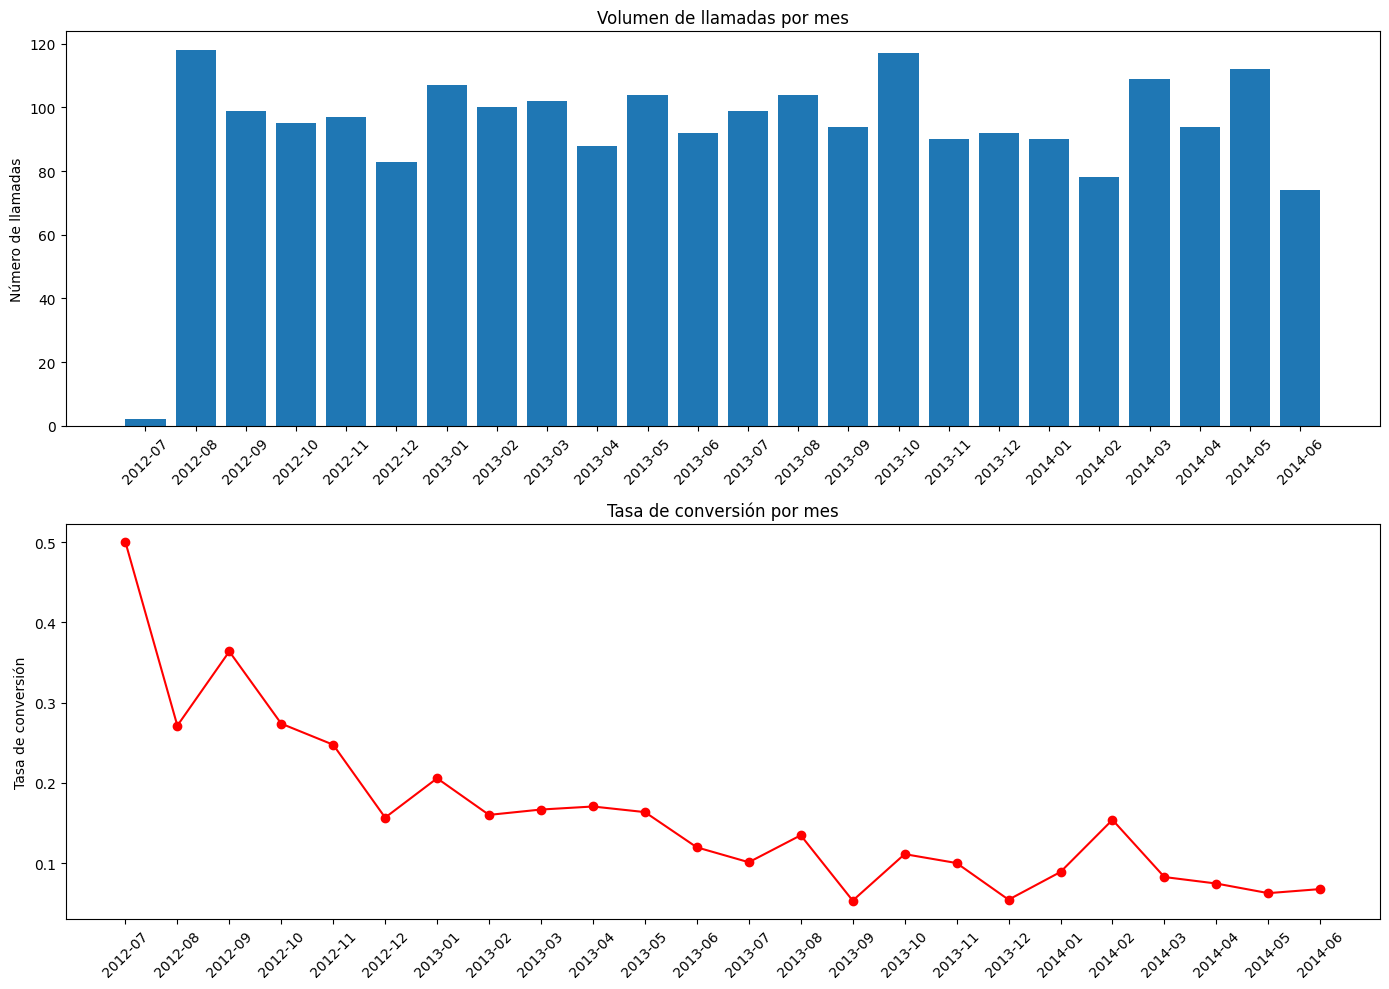

In [7]:
df['mes_año'] = df['Dt_Customer'].dt.to_period('M')

# Calcular tasa de conversión por mes
conversion_mensual = df.groupby('mes_año')['Response'].agg(['count', 'mean']).reset_index()
conversion_mensual.columns = ['mes_año', 'total_llamadas', 'tasa_conversion']

# Gráfico dual: volumen y tasa de conversión
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# Volumen de llamadas
ax1.bar(conversion_mensual['mes_año'].astype(str), conversion_mensual['total_llamadas'])
ax1.set_title('Volumen de llamadas por mes')
ax1.set_ylabel('Número de llamadas')
ax1.tick_params(axis='x', rotation=45)

# Tasa de conversión
ax2.plot(conversion_mensual['mes_año'].astype(str), conversion_mensual['tasa_conversion'], marker='o', color='red')
ax2.set_title('Tasa de conversión por mes')
ax2.set_ylabel('Tasa de conversión')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [8]:
# Discretizamos:
# Extraer características clave
df['año'] = df['Dt_Customer'].dt.year
df['mes'] = df['Dt_Customer'].dt.month
df['dia_semana'] = df['Dt_Customer'].dt.dayofweek  # 0=Lunes, 6=Domingo
df['trimestre'] = df['Dt_Customer'].dt.quarter
df['es_fin_semana'] = (df['Dt_Customer'].dt.dayofweek >= 5).astype(int)

In [9]:
# Saco variable con formato fecha que Sckit no lo toma:
df=df.drop(['mes_año', 'Dt_Customer'], axis=1)

In [10]:
# Elimino 2 columnas que solo tienen 1 valor
print(f'{df['Z_CostContact'].unique()}')
print(f'{df['Z_Revenue'].unique()}')

[3]
[11]


In [11]:
# Elimino la variable ID que tampoco suma para el modelo:

In [12]:
df=df.drop(['ID',	'Z_Revenue', 'Z_CostContact'], axis=1)

In [13]:
status(df)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,Year_Birth,0,0.000000,0,0.000000,59,int64
1,Education,0,0.000000,0,0.000000,5,object
2,Marital_Status,0,0.000000,0,0.000000,8,object
3,Income,24,0.010714,0,0.000000,1974,float64
4,Kidhome,0,0.000000,1293,0.577232,3,int64
5,Teenhome,0,0.000000,1158,0.516964,3,int64
6,Recency,0,0.000000,28,0.012500,100,int64
7,MntWines,0,0.000000,13,0.005804,776,int64
8,MntFruits,0,0.000000,400,0.178571,158,int64
9,MntMeatProducts,0,0.000000,1,0.000446,558,int64


*Comentario de Car:* A priori no veo columnas que podamos mapear y pasar a 1-0 de una, las últimas ya están en ese formato.

In [14]:
#Esta la pasamos a dummie
print(f'{df['Education'].unique()}')
print(f'{df['Marital_Status'].unique()}')

['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


In [15]:
df1 = pd.get_dummies(df)

In [16]:
status(df1)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,Year_Birth,0,0.000000,0,0.000000,59,int64
1,Income,24,0.010714,0,0.000000,1974,float64
2,Kidhome,0,0.000000,1293,0.577232,3,int64
3,Teenhome,0,0.000000,1158,0.516964,3,int64
4,Recency,0,0.000000,28,0.012500,100,int64
5,MntWines,0,0.000000,13,0.005804,776,int64
6,MntFruits,0,0.000000,400,0.178571,158,int64
7,MntMeatProducts,0,0.000000,1,0.000446,558,int64
8,MntFishProducts,0,0.000000,384,0.171429,182,int64
9,MntSweetProducts,0,0.000000,419,0.187054,177,int64


## 3) Clasificación

### 3.1) Separación de X de Y, y luego TR de TS (rutina):

In [17]:
data_x = df1.drop('Response', axis=1)
data_y = df1['Response']

In [18]:
data_x = data_x.values
data_y = data_y.values

In [19]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.3)

### 3.2) Creación del modelo predictivo

In [20]:
from sklearn.ensemble import RandomForestClassifier

# Creamos 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000, random_state = 99)

In [21]:
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=99)

### 3.3) Predicción de la clase y score

In [22]:
rf.predict(x_train)

array([0, 0, 1, ..., 0, 0, 1])

In [23]:
pred_probs=rf.predict_proba(x_train)

In [24]:
pred_probs

array([[0.996     , 0.004     ],
       [0.97266667, 0.02733333],
       [0.308     , 0.692     ],
       ...,
       [0.95966667, 0.04033333],
       [0.968     , 0.032     ],
       [0.074     , 0.926     ]])

In [25]:
y_prob_tr=pred_probs[:,1]

In [26]:
y_prob_tr

array([0.004     , 0.02733333, 0.692     , ..., 0.04033333, 0.032     ,
       0.926     ])

#### Guardo en Pickle el modelo que hicimos:
- Guarden el modelo de clasificación Random forest como `rfc.pkl`.

In [27]:
import pickle

In [28]:
# Guardar en el disco
filename = 'rfc.pkl'
pickle.dump(rf, open(filename, 'wb')) # rf = nuestro modelo

In [29]:
# Lo cargamos para usarlo en otro momento.
rf_loaded = pickle.load(open(filename, 'rb'))

Creen un modelo con regresión lineal y con Random Forest + GridsearchCV para predecir la columna Income.

### 3.4) Matriz de confusión

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns

#### A) VALORES ABSOLUTOS

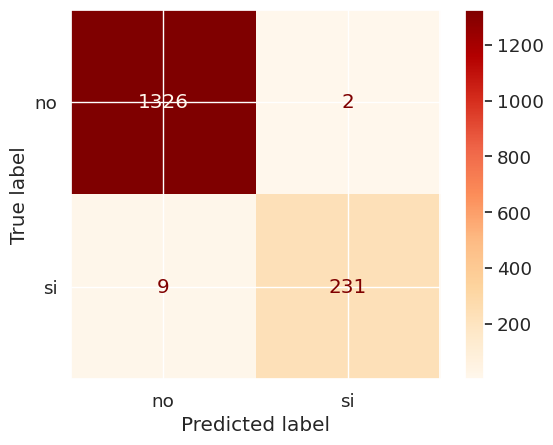

In [31]:
sns.set_theme(font_scale=1.2) #  Ajuste tamaño de letra (var global)

ConfusionMatrixDisplay.from_estimator(
    rf, x_train, y_train,
    display_labels=['no','si'],
    cmap='OrRd',
    )

#### B) NORMALIZANDO

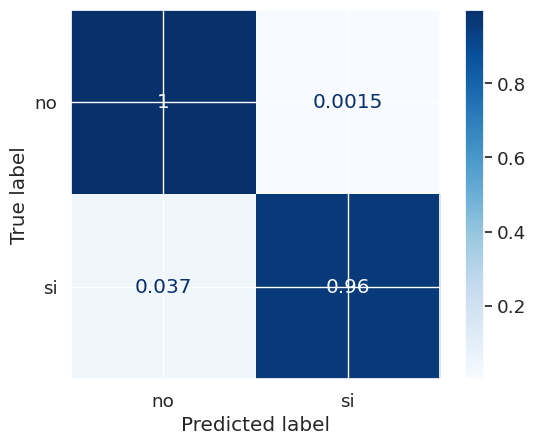

In [32]:
ConfusionMatrixDisplay.from_estimator(
    rf, x_train, y_train,
    display_labels=['no','si'],
    cmap='Blues',
    normalize='true',
    )

#### c) No permite variar el punto de corte, entonces:

In [33]:
y_pred1=rf.predict(x_train)

conf_mat1=pd.crosstab(index=y_train,    # filas = valor real
                     columns=y_pred1,   # columnas = valor predicho
                     rownames=['Actual'],
                     colnames=['Pred'],
                     normalize='index')

print(conf_mat1)

Pred           0         1
Actual                    
0       0.998494  0.001506
1       0.037500  0.962500


In [34]:
pd.crosstab(index=y_train,    # filas = valor real
                     columns=y_pred1,   # columnas = valor predicho
                     rownames=['Actual'],
                     colnames=['Pred'],
                     normalize= True)

Pred,0,1
Actual,,
0,0.845663,0.001276
1,0.005740,0.147321


#### d) Seteo del punto de corte

In [35]:
y_prob_tr

array([0.004     , 0.02733333, 0.692     , ..., 0.04033333, 0.032     ,
       0.926     ])

#### e) ¡Importante! Elección de un punto de corte

La primer opción es un punto que sea mayor al promedio.
Lo seteo y luego creo el label.

In [36]:
y_prob_tr.mean()

0.15428530101028506

In [37]:
import numpy as np

# Reemplazo el punto de corte con el promedio obtenido
y_pred2=np.where(y_prob_tr > 0.15, "si", "no")

In [38]:
y_pred2

array(['no', 'no', 'si', ..., 'no', 'no', 'si'], dtype='<U2')

#### f) Matriz de confusión (punto de corte custom)

In [39]:
conf_mat2=pd.crosstab(index=y_train,
                      columns=y_pred2,      # ¡cambio!
                      rownames=['Actual'],
                      colnames=['Pred'],
                      normalize='index')

print(conf_mat2)

Pred          no        si
Actual                    
0       0.954819  0.045181
1       0.000000  1.000000


####Comparando antes y después:

In [40]:
import matplotlib.pyplot as plt

print("### Matriz Predicciones corte 0.5 (default)")
print(conf_mat1)

print("-"*40)
print("### Matriz Predicciones corte 0.15 ")
print(conf_mat2)

### Matriz Predicciones corte 0.5 (default)
Pred           0         1
Actual                    
0       0.998494  0.001506
1       0.037500  0.962500
----------------------------------------
### Matriz Predicciones corte 0.15 
Pred          no        si
Actual                    
0       0.954819  0.045181
1       0.000000  1.000000


#### g) Análisis de los distintos puntos de corte

*Comentario de Car:* *esto tarda cuando lo procesan y parece que da cualquiera! jajaja* ✌

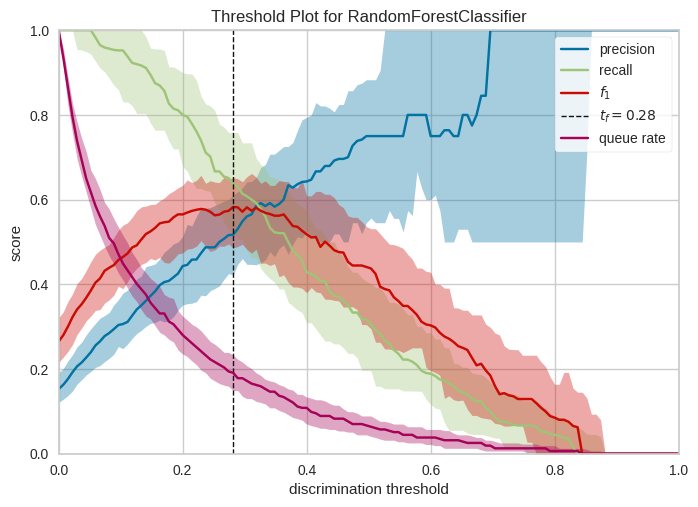

<Axes: title={'center': 'Threshold Plot for RandomForestClassifier'}, xlabel='discrimination threshold', ylabel='score'>

In [41]:
from yellowbrick.classifier import DiscriminationThreshold

visualizer = DiscriminationThreshold(rf)

visualizer.fit(x_train, y_train)        # Ajustar data al visualizador
visualizer.show()                       # Mostrar figura

#### h) Curva ROC

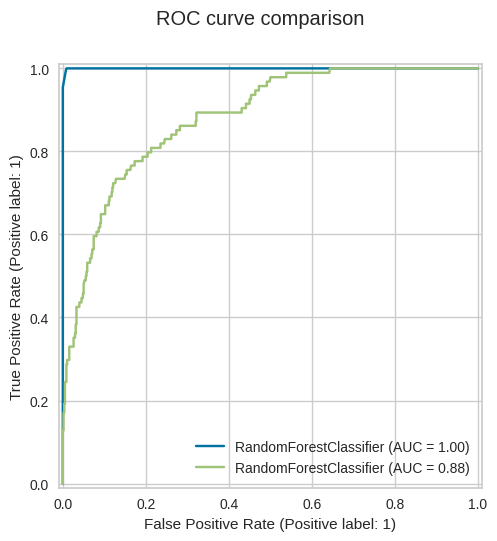

In [42]:
from sklearn.metrics import RocCurveDisplay

tr_disp = RocCurveDisplay.from_estimator(rf, x_train, y_train)
ts_disp = RocCurveDisplay.from_estimator(rf, x_test, y_test, ax=tr_disp.ax_)
ts_disp.figure_.suptitle("ROC curve comparison")

plt.show()

## 4) Regresión

**CONSIGNA:** Creen un modelo con regresión lineal y con Random Forest + GridsearchCV para predecir la columna `Income`.

#### 4.1) Análisis exploratorio de datos (AED)

In [43]:
status(df1)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,Year_Birth,0,0.000000,0,0.000000,59,int64
1,Income,24,0.010714,0,0.000000,1974,float64
2,Kidhome,0,0.000000,1293,0.577232,3,int64
3,Teenhome,0,0.000000,1158,0.516964,3,int64
4,Recency,0,0.000000,28,0.012500,100,int64
5,MntWines,0,0.000000,13,0.005804,776,int64
6,MntFruits,0,0.000000,400,0.178571,158,int64
7,MntMeatProducts,0,0.000000,1,0.000446,558,int64
8,MntFishProducts,0,0.000000,384,0.171429,182,int64
9,MntSweetProducts,0,0.000000,419,0.187054,177,int64


Vamos a eliminar los nan de nuestra variable objetivo (income) porque representan el 1% de los datos.

In [44]:
# Eliminar filas que contengan NaN
df1 = df1.dropna(subset=['Income'])

/tmp/ipython-input-2927364384.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df1.hist(ax = fig.gca())


array([[<Axes: title={'center': 'Year_Birth'}>,
        <Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'Kidhome'}>,
        <Axes: title={'center': 'Teenhome'}>,
        <Axes: title={'center': 'Recency'}>],
       [<Axes: title={'center': 'MntWines'}>,
        <Axes: title={'center': 'MntFruits'}>,
        <Axes: title={'center': 'MntMeatProducts'}>,
        <Axes: title={'center': 'MntFishProducts'}>,
        <Axes: title={'center': 'MntSweetProducts'}>],
       [<Axes: title={'center': 'MntGoldProds'}>,
        <Axes: title={'center': 'NumDealsPurchases'}>,
        <Axes: title={'center': 'NumWebPurchases'}>,
        <Axes: title={'center': 'NumCatalogPurchases'}>,
        <Axes: title={'center': 'NumStorePurchases'}>],
       [<Axes: title={'center': 'NumWebVisitsMonth'}>,
        <Axes: title={'center': 'AcceptedCmp3'}>,
        <Axes: title={'center': 'AcceptedCmp4'}>,
        <Axes: title={'center': 'AcceptedCmp5'}>,
        <Axes: title={'center': 'Accepted

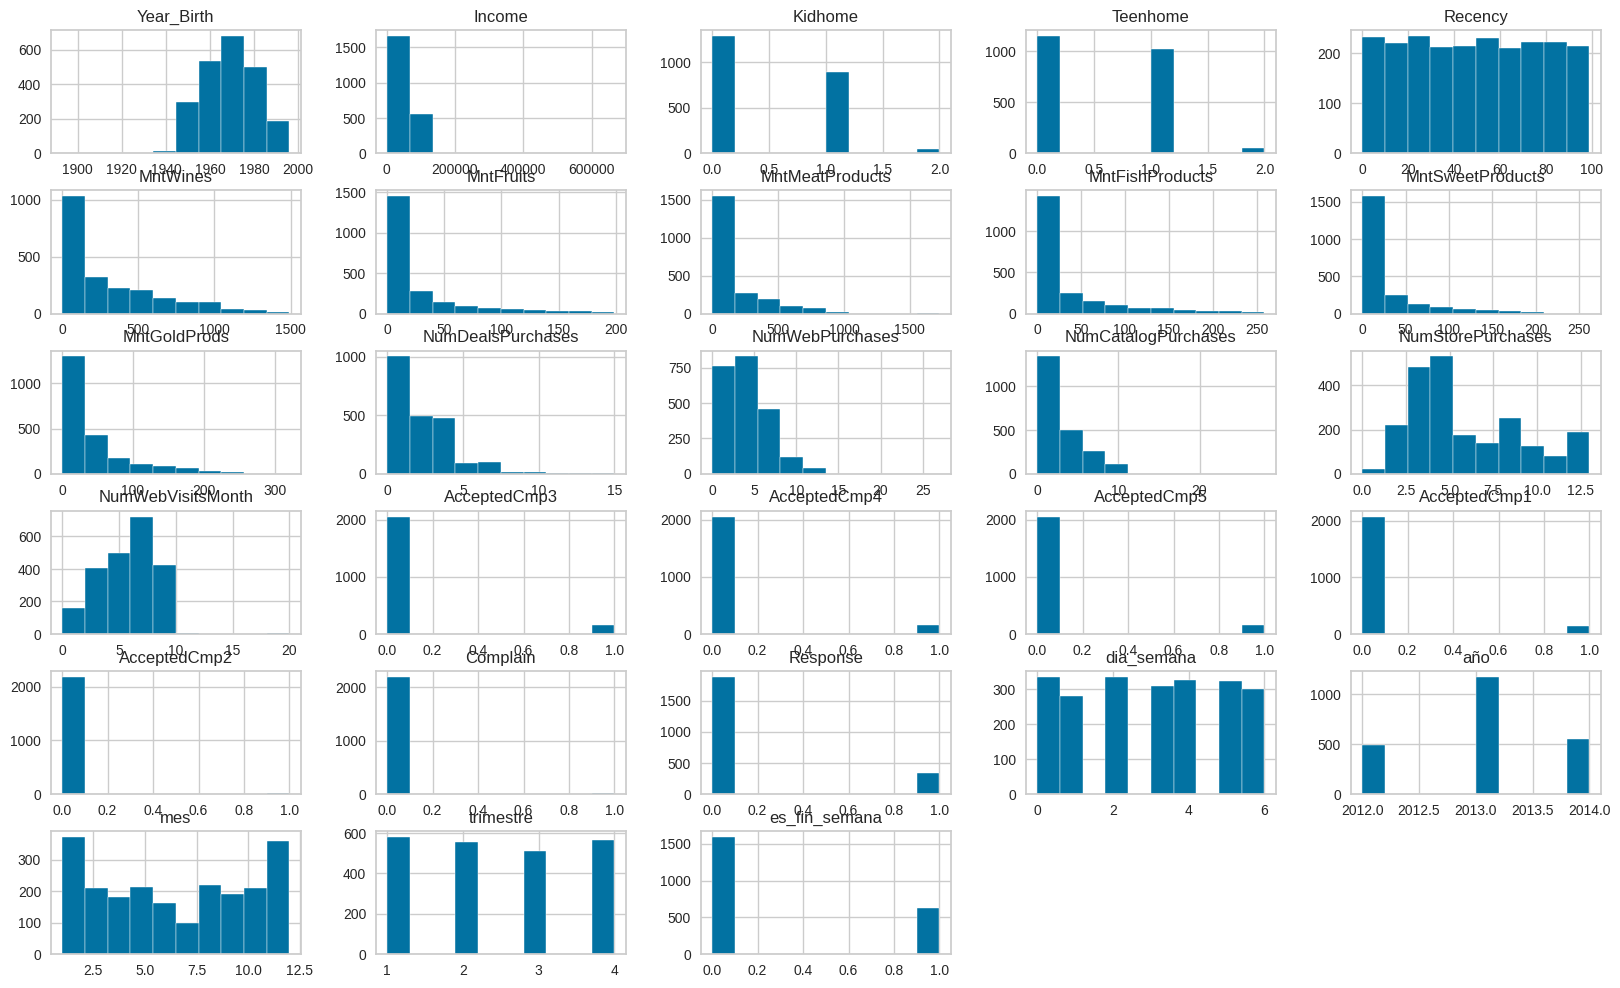

In [45]:
#Histogramas de las variables:
fig = plt.figure(figsize = (20,12))
df1.hist(ax = fig.gca())

*Comentario Car:*
Las variables AcceptedCmp1, AcceptedCmp2... y así son si aceptó la compra en la primera vez, segunda y así.

Análisis del target

In [46]:
from plotnine import ggplot, geom_histogram, aes

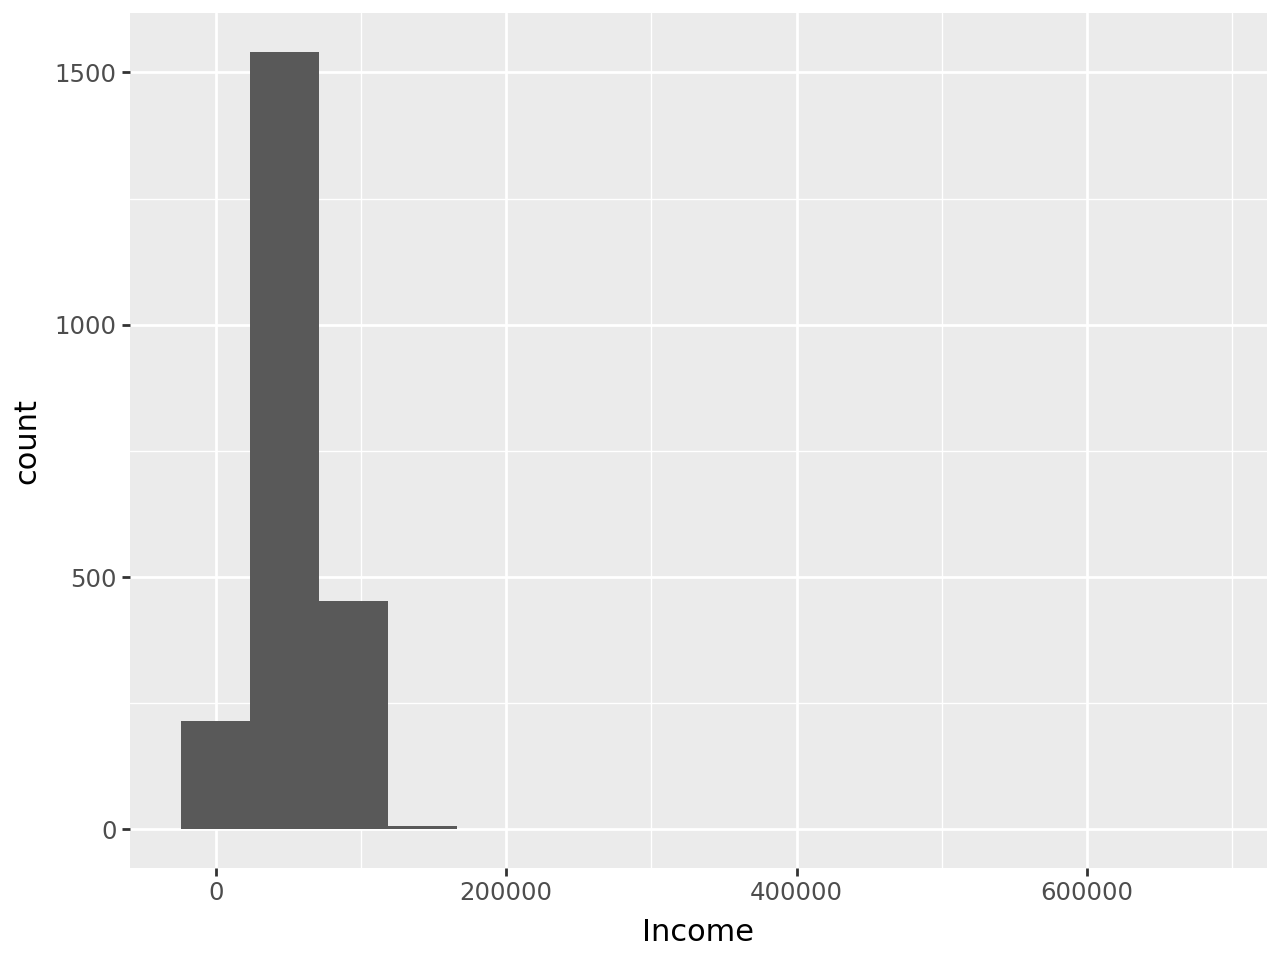

In [52]:
(ggplot(df1)
 + aes(x='Income')
 + geom_histogram(bins=15)
)

In [49]:
from funpymodeling.exploratory import profiling_num

profiling_num(df1['Income'])

,variable,mean,std_dev,variation_coef,p_0.01,p_0.05,p_0.25,p_0.5,p_0.75,p_0.95,p_0.99
0,Income,52247.251354,25173.076661,0.481807,7579.2,18985.5,35303.0,51381.5,68522.0,84130.0,94458.8


In [63]:
#Me fijo cuál es el valor máximo:
print(f'{df1['Income'].describe().max()}')
df1.shape

666666.0


(2216, 41)

In [66]:
# Voy a filtrar esos outliers
df2 = df1[df1['Income'] <= 94500]

In [68]:
#Me fijo cuál es el valor máximo:
print(f'{df2['Income'].describe().max()}')
df2.shape

94472.0


(2194, 41)

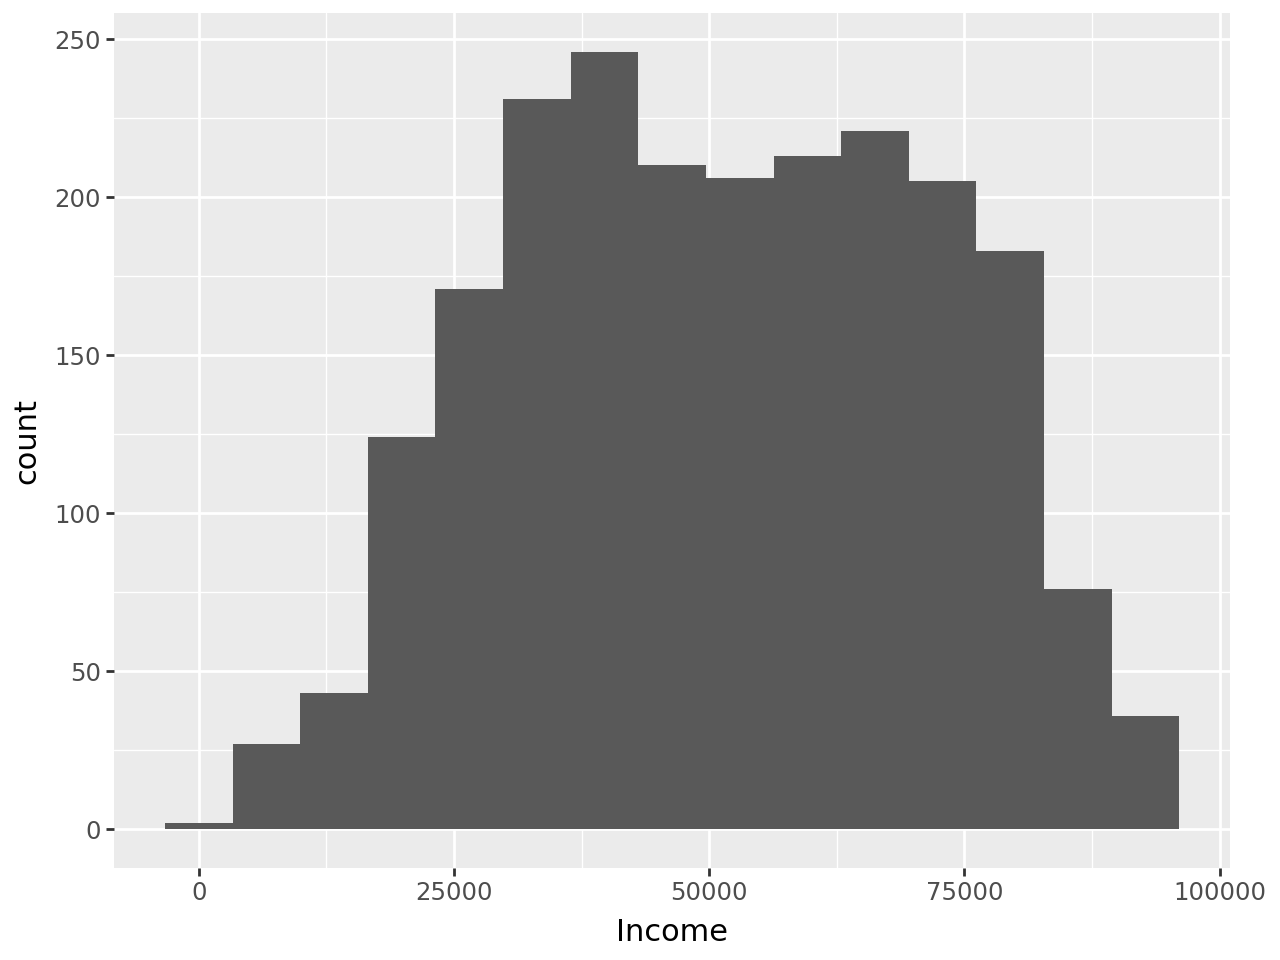

In [69]:
(ggplot(df2)
 + aes(x='Income')
 + geom_histogram(bins=15)
)

#### 4.2) Separación TR/TS

In [70]:
x_data_reg = df2.drop('Income', axis=1)
y_data_reg = df2['Income']

In [ ]:
# Obtenemos los valores del dataframe, para evitar el siguiente warning más adelante.
# <br>UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names.

#x_data_reg = x_data_reg.values
#y_data_reg = y_data_reg.values

In [71]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data_reg, y_data_reg, test_size=0.3)

#### 4.3) Creación del modelo de regresión lineal

In [72]:
from sklearn.linear_model import LinearRegression

# a.Creamos modelo
model = LinearRegression()

# b. fiteamos
model.fit(x_train, y_train)

# c. obtenemos predicciónes para tr y ts
pred_tr=model.predict(x_train)
pred_ts=model.predict(x_test)

In [73]:
pred_tr[0:5]

array([87493.95595444, 29633.28680714, 63705.56998535, 64396.86390503,
       41338.65299026])

#### 4.4) Creación del RF con hypertuning (usando grid search)

In [74]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor()

In [76]:
params = {
    'n_estimators' : [10, 100, 300, 500,1000],
    'max_features': [50,100],
    #'bootstrap': [False, True],
    #'max_depth': [50, 500],
    #'min_samples_leaf': [3, 50],
    #'min_samples_split': [10, 50],
}

grid_rf = GridSearchCV(estimator = model_rf,
                        param_grid = params,
                        scoring = 'neg_mean_absolute_error',
                        cv = 5,
                        verbose = 1
                        )

**NOTA**: Esta parte tarda, porque compara todos los modelos con los parámetros que le pasamos.

In [77]:
grid_rf.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [50, 100],
                         'n_estimators': [10, 100, 300, 500, 1000]},
             scoring='neg_mean_absolute_error', verbose=1)

In [78]:
#Acá me dice cuál fue el mejor de los modelos que corrimos antes.
grid_rf.best_estimator_

RandomForestRegressor(max_features=100, n_estimators=1000)

Predicción de casos nuevos:

In [79]:
grid_rf.predict(x_train)
grid_rf.predict(x_test)

array([40537.391, 45042.526, 74891.359, 28722.681, 37224.627, 28660.331,
       71339.177, 78264.699, 32830.042, 66410.663, 29981.55 , 59025.805,
       81420.742, 77353.175, 45954.947, 61110.636, 70504.727, 51622.441,
       49769.646, 36293.311, 36585.967, 41014.073, 56137.146, 73303.969,
       69064.819, 64127.481, 83446.392, 78355.702, 39818.411, 74071.275,
       61508.921, 45563.169, 37222.56 , 39154.411, 30419.719, 32957.884,
       36781.435, 79796.602, 74163.824, 48799.838, 43351.013, 81114.461,
       56233.261, 31819.827, 79129.897, 23781.769, 34562.165, 57071.33 ,
       49767.847, 77604.124, 28083.641, 76833.963, 57311.64 , 21221.007,
       81163.36 , 46058.04 , 34025.49 , 38281.116, 18700.028, 42840.309,
       62621.064, 73837.745, 64936.425, 64103.582, 69044.566, 68368.705,
       55404.702, 30838.407, 35269.044, 63858.886, 32446.962, 31525.39 ,
       49587.343, 57425.351, 33738.592, 70922.26 , 29551.527, 41866.429,
       66087.059, 25705.34 , 22915.988, 18744.798, 

In [80]:
#Acá me dice cuáles son los mejores parámetros:
grid_rf.best_params_

{'max_features': 100, 'n_estimators': 1000}

#### 4.5) Análisis de las métricas de error

In [81]:
pd.concat([pd.DataFrame(grid_rf.cv_results_["params"]),
           pd.DataFrame(grid_rf.cv_results_["mean_test_score"],
                        columns=["neg_mean_absolute_error"])],axis=1).sort_values('neg_mean_absolute_error', ascending=False)

,max_features,n_estimators,neg_mean_absolute_error
9,100,1000,-5526.069106
7,100,300,-5526.220465
4,50,1000,-5531.757868
8,100,500,-5534.266608
3,50,500,-5534.999015
6,100,100,-5538.878300
1,50,100,-5541.132228
2,50,300,-5566.764517
5,100,10,-5750.358241
0,50,10,-5815.362476


Análisis métrica TR vs TS:

In [82]:
grid_rf.score(x_train, y_train)

-1953.7179628664494

In [83]:
grid_rf.score(x_test, y_test)

-5195.338610015175

#### 4.6) Gráfico de la curva del error

**Gráfico de prediction error**

- Linea gris: Lo que nos gustaría que fuera
- Linea negra: El ajuste de regresión, de la regresión misma

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names


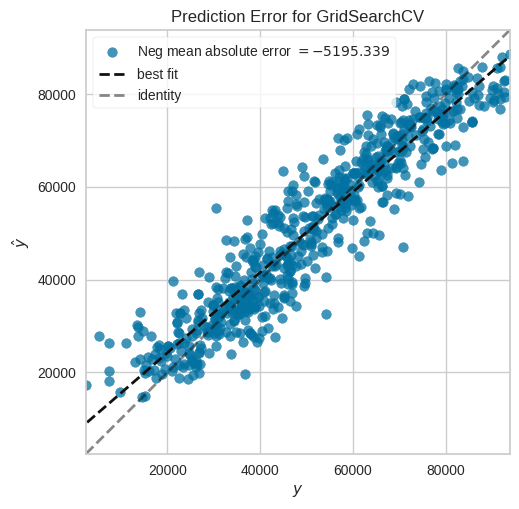

<Axes: title={'center': 'Prediction Error for GridSearchCV'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [84]:
from yellowbrick.regressor import PredictionError

vis_pred_err = PredictionError(grid_rf)

vis_pred_err.fit(x_train, y_train)  # Fiteamos los datos al visualizador
vis_pred_err.score(x_test, y_test)  # Calculamos las métricas para test
vis_pred_err.show()                 # Visualizamos!

**Gráfico de residuos**

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names


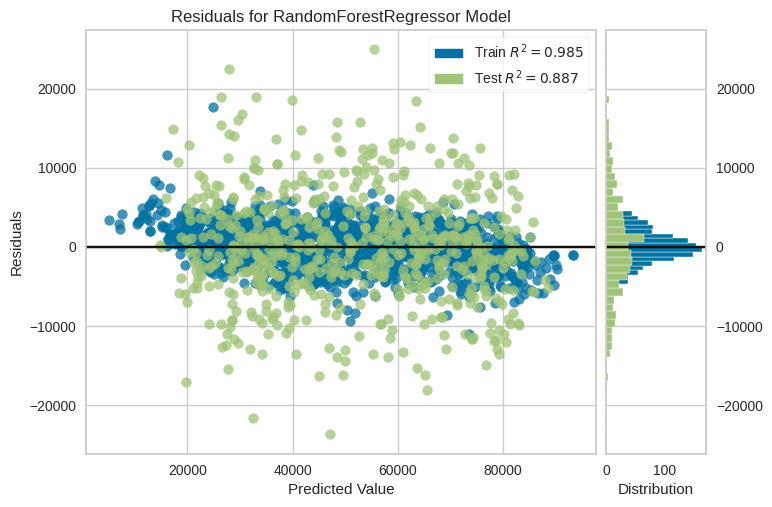

<Axes: title={'center': 'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [85]:
from yellowbrick.regressor import ResidualsPlot

# ojo: poner best_estimator_
vis_res = ResidualsPlot(grid_rf.best_estimator_)


# Copy-paste de la doc oficial:
vis_res.fit(x_train, y_train)  # Fiteamos los datos al visualizador
vis_res.score(x_test, y_test)  # Calculamos las métricas para test
vis_res.show()                 # Visualizamos!

## 5) Guardar un modelo

- Guardar ambos modelos de regresion en pkl `lr.pkl` y `rfr.pkl`

In [86]:
import pickle

In [87]:
# Guardar en el disco
filename = 'rfr.pkl'
pickle.dump(rf, open(filename, 'wb')) # rfr = nuestro modelo

In [88]:
# Lo cargamos para usarlo en otro momento.
rf_loaded = pickle.load(open(filename, 'rb'))